In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pygraphviz as pgv
from IPython.display import Image

# Graph Definition (nodes and edges)

In [2]:
# NODES
# - Users
USER_OMNIA_RELAY = 'Omnia Relay'
USER_POKE = 'Poke User'
USER_GOV = 'Gov User'
USER_DRIP = 'Drip User'
USER_DSR = 'DSR User'
USER_PSM = 'PSM User'
USER_ESM = 'ESM User'
USER_END = 'End User'
USER_AUCTION = 'Auction User'
USER_URN = 'Urn User'
USER_FLASH = 'Flash User'

# - Files/filelike
IOU = 'IOU'
VOTE_PROXY = 'Vote Proxy'
DS_CHIEF = 'DS Chief'
DS_PAUSE = 'DS Pause'
DS_SPELL = 'DS Spell'
MEDIAN = 'Median'
OSM = 'OSM'
SPOT = 'spot'
JUG = 'jug'
POT = 'pot'
PSM = 'PSM'
ESM = 'ESM'
END = 'End'
VAT = 'vat'
CDP_MANAGER = 'CDP Manager'
DS_PROXY = 'DS Proxy'
DOG = 'dog'
VOW = 'vow'
ABACUS = 'Abacus'
CLIP = 'clip'
FLOP = 'flop'
MKR = 'MKR'
FLAP = 'flap'
DAI = 'dai'
DAI_JOIN = 'DAI Join'
GEM_JOIN = 'GEM Join'
GEM = 'Gem'
FLASH = 'Flash'

K_NONE = '(none)'
K_USER = 'User'
K_GOV = 'Governance Module'
K_SYS = 'System Stabilizer Module'
K_COLL = 'Collateral Module'
K_CDP = 'CDP Core Module'
K_RATES = 'Rates Module'
K_DAI = 'Dai Module'
K_ORACLE = 'Oracle Module'
K_PROXY = 'Proxy Module'
K_PEG = 'Peg Stablity Module'
K_FLASH = 'Flash Module'
K_ESM = 'Emergency Shutdown Module'
K_MKR = 'MKR Module'
K_SHUTDOWN = 'Shutdown'
K_LIQ = 'Liquidation Module' # not included in original legend (color undefined in legend)

node_to_kind = {
    # user
    USER_OMNIA_RELAY: K_NONE,
    USER_POKE: K_USER,
    USER_GOV: K_USER,
    USER_DRIP: K_USER,
    USER_DSR: K_USER,
    USER_PSM: K_USER,
    USER_ESM: K_USER,
    USER_END: K_USER,
    USER_AUCTION: K_USER,
    USER_URN: K_USER,
    USER_FLASH: K_USER,
    # file/filelike
    IOU: K_NONE,
    VOTE_PROXY: K_PROXY,
    DS_CHIEF: K_GOV,
    DS_PAUSE: K_GOV,
    DS_SPELL: K_GOV,
    MEDIAN: K_ORACLE,
    OSM: K_ORACLE,
    SPOT: K_CDP,
    JUG: K_RATES,
    POT: K_RATES,
    PSM: K_PEG,
    ESM: K_ESM,
    END: K_SHUTDOWN,
    VAT: K_CDP,
    CDP_MANAGER: K_PROXY,
    DS_PROXY: K_PROXY,
    DOG: K_CDP,
    VOW: K_SYS,
    ABACUS: K_LIQ,
    CLIP: K_LIQ,
    FLOP: K_SYS,
    MKR: K_MKR,
    FLAP: K_SYS,
    DAI: K_DAI,
    DAI_JOIN: K_DAI,
    GEM_JOIN: K_COLL,
    GEM: K_NONE,
    FLASH: K_FLASH,
}

nodes = list(node_to_kind.keys())

In [3]:
# edge kind
E_AUTH = 'Auth'
E_PUB = 'Public'
E_GOV = 'Governance'


edge_kind_to_color = {
    E_AUTH: "black",
    E_PUB: "blue",
    E_GOV: "red"
}


# done columnwise, outgoing edges for each node within column.
# outgoing edges *generally* ordered in the way they appear in the original diagram (top to bottom)
# but not guaranteed.
edge_data = [
    (USER_OMNIA_RELAY, MEDIAN, E_AUTH, 'poke'),
    (USER_POKE, OSM, E_PUB, 'poke'),
    (USER_POKE, SPOT, E_PUB, 'poke'),
    (USER_GOV, VOTE_PROXY, E_PUB, 'lock | free'),
    (USER_GOV, DS_CHIEF, E_PUB, 'lift'),
    (USER_GOV, DS_PAUSE, E_PUB, 'execute'),
    (USER_GOV, DS_SPELL, E_PUB, 'cast'),
    (USER_DRIP, JUG, E_PUB, 'drip'),
    (USER_DSR, POT, E_PUB, 'join | exit | drip'),
    (USER_PSM, PSM, E_PUB, 'sellGem | buyGem'),
    (IOU, VOTE_PROXY, E_AUTH),
    (VOTE_PROXY, DS_CHIEF, E_PUB, 'lock | free'),
    (DS_CHIEF, MKR, E_AUTH, 'push | pull'),
    (DS_PAUSE, MEDIAN, E_GOV),
    (DS_PAUSE, OSM, E_GOV),
    (DS_PAUSE, SPOT, E_GOV),
    (DS_PAUSE, END, E_GOV),
    (DS_PAUSE, DOG, E_GOV),
    (DS_PAUSE, CLIP, E_GOV),
    (DS_PAUSE, FLOP, E_GOV),
    (DS_PAUSE, VOW, E_GOV),
    (DS_PAUSE, FLAP, E_GOV),
    (DS_PAUSE, VAT, E_GOV),
    (DS_PAUSE, DAI_JOIN, E_GOV),
    (DS_PAUSE, GEM_JOIN, E_GOV),
    (DS_PAUSE, FLASH, E_GOV),
    (DS_PAUSE, PSM, E_GOV),
    (DS_PAUSE, JUG, E_GOV),
    (DS_PAUSE, POT, E_GOV),
    (DS_SPELL, DS_PAUSE, E_AUTH, 'plot'), # need to double check this one. Doesn't have an arrow :(
    (OSM, MEDIAN, E_AUTH, 'peek'),
    (SPOT, OSM, E_AUTH, 'peek'),
    (SPOT, VAT, E_AUTH, 'file'),
    (JUG, VAT, E_AUTH, 'fold'),
    (POT, VAT, E_AUTH, 'suck | move'),
    (PSM, VAT, E_AUTH, 'frob | move'),
    (ESM, END, E_AUTH, 'cage'),
    (END, VAT, E_AUTH, 'suck | hope | grab | move | flux'),
    (END, CLIP, E_AUTH, 'yank'),
    (CDP_MANAGER, VAT, E_PUB, 'frob | flux | move | fork'),
    (DS_PROXY, CDP_MANAGER, E_PUB),
    (DS_PROXY, POT, E_PUB, 'frob | move'),
    (DS_PROXY, DAI_JOIN, E_PUB, 'join | exit'),
    (DS_PROXY, GEM_JOIN, E_PUB, 'join | exit'),
    (DS_PROXY, GEM, E_PUB, 'approve'),
    (DOG, CLIP, E_AUTH, 'kick'),
    (DOG, VOW, E_AUTH, 'fess'),
    (VOW, VAT, E_PUB, 'heal'),
    (VOW, FLOP, E_AUTH, 'kick'),
    (VOW, FLAP, E_AUTH, 'kick'),
    (CLIP, ABACUS, E_PUB, 'price'),
    (FLOP, MKR, E_AUTH, 'mint'),
    (FLAP, MKR, E_PUB, 'move | burn'), # merged 2 edges into 1, idk why they were separate
    (DAI_JOIN, DAI, E_AUTH, 'burn | mint'), # I'm guessing at direction here, does't have arrow
    (GEM_JOIN, VAT, E_AUTH, 'slip'), 
    (GEM_JOIN, GEM, E_PUB, 'transfer'),
    (FLASH, VAT, E_AUTH, 'suck | heal'),
    (USER_ESM, ESM, E_PUB, 'join | fire'),
    (USER_END, END, E_PUB, 'skip | skim | free | thaw | flow | pack | cash | cage'),
    (USER_END, FLOP, E_AUTH, 'yank'),
    (USER_END, FLAP, E_PUB, 'yank'),
    (USER_AUCTION, DOG, E_PUB, 'bark'),
    (USER_AUCTION, CLIP, E_PUB, 'take | redo'),
    (USER_AUCTION, FLOP, E_PUB, 'dent | deal'),
    (USER_AUCTION, VOW, E_PUB, 'flap | flop'),
    (USER_AUCTION, MKR, E_PUB, 'transfer'),
    (USER_AUCTION, FLAP, E_PUB, 'tend | deal'),
    (USER_URN, DAI, E_PUB, 'transfer'),
    (USER_URN, DAI_JOIN, E_PUB, 'join | exit'),
    (USER_URN, GEM_JOIN, E_PUB, 'join | exit'),
    (USER_URN, VAT, E_PUB, 'frob'),
    (USER_URN, GEM, E_PUB, 'approve'),
    (USER_FLASH, FLASH, E_PUB, 'vatDaiFlashLoan'),
    (USER_URN, DS_PROXY, E_PUB, 'open | lock | free | draw | wipe | give'),
]

# Viz whole graph

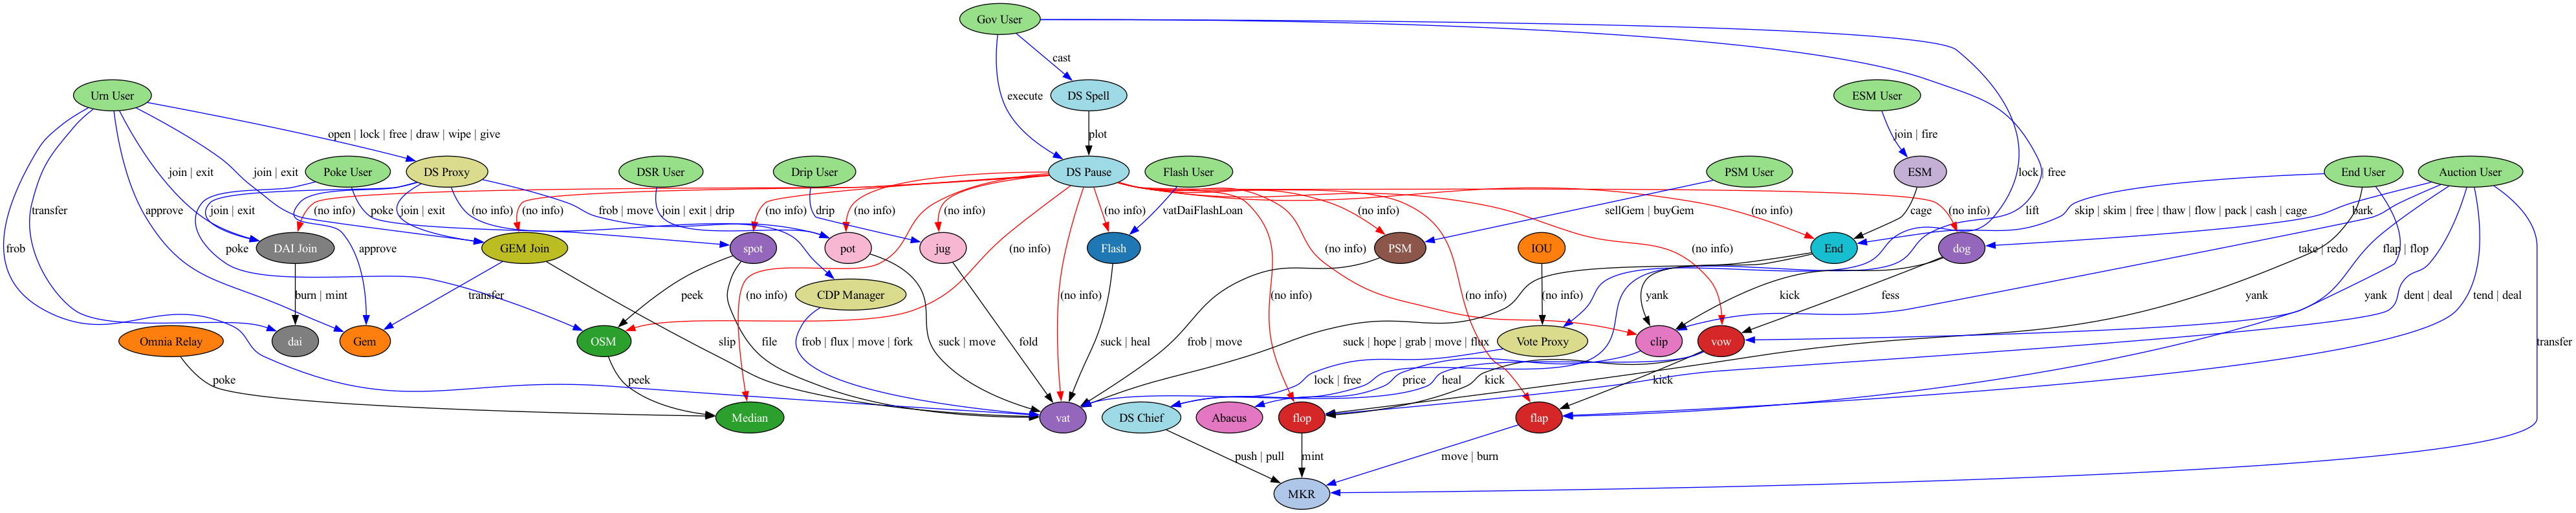

In [23]:
edge_kind_to_weight = {
    E_AUTH: 5,
    E_PUB: 1,
    E_GOV: 2
}

deprioritize_nodes = {
    DS_PAUSE
}

def is_dark_color(hex_color):
    # Remove the '#' from the start of the color if it's there
    hex_color = hex_color.lstrip('#')

    # Convert the hex color to RGB
    r, g, b = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

    # Calculate the brightness
    brightness = (0.299 * r + 0.587 * g + 0.114 * b) / 255

    # Check if the brightness is less than 0.5
    return brightness < 0.5


# Create a new graph
G = pgv.AGraph(directed=True)

# Get a list of all unique kinds
kinds = list(set(node_to_kind.values()))
# Create a colormap
cmap = plt.get_cmap('tab20', len(kinds))
# Create a color map that maps kinds to colors
color_map = {kind: mcolors.to_hex(cmap(i)) for i, kind in enumerate(kinds)}


# Add nodes and edges with their properties
for node in nodes:
    kind = node_to_kind[node]
    color = color_map[kind]
    G.add_node(node, kind=kind, fillcolor=color, style='filled', fontcolor='white' if is_dark_color(color) else 'black')

for ed in edge_data:
    if len(ed) == 3:
        s, t, k = ed
        m = '(no info)'
    elif len(ed) == 4:
        s, t, k, m = ed
    else:
        print(f"Oh no! {ed}")
        raise ValueError("Edge data should be a 3-tuple or 4-tuple")
    w = edge_kind_to_weight[k]
    if s in deprioritize_nodes or t in deprioritize_nodes:
        w += 100
    G.add_edge(s, t, kind=k, label=m, weight=w, color=edge_kind_to_color[k])
    # G.add_edge(s, t, label=k, methods=m)

# Render the graph to a file (you can also use other formats like png, pdf, etc.)
G.draw('graph.png', prog='dot', format='png')

# Display the graph
Image('graph.png')

# Generate Useful Subgraph

In [24]:
SELECTED_NODES = [
    DAI,
    MKR, # token.sol
    MEDIAN,
    VAT,
    FLAP,
    FLOP,

    USER_GOV,
    USER_END,
    USER_URN,
    USER_AUCTION
]

G_nx = nx.to_networkx_graph(G)

# correct str -> float weights (issue with graphviz -> nx conversion)
for u, v, data in G_nx.edges(data=True):
    data['weight'] = float(data['weight'])

G_nx_undirected = G_nx.to_undirected()

# Get the largest connected component
largest_cc = max(nx.connected_components(G_nx_undirected), key=len)

# Create a subgraph with only the nodes in the largest connected component
G_nx_undirected_conn = G_nx_undirected.subgraph(largest_cc).copy()




## Retrieve all possible paths (too many paths, ignore)

In [25]:
# Retrieve all paths between selected nodes. Was an insane number, lol.

# lines = []
# for s in SELECTED_NODES:
#     for t in SELECTED_NODES:
#         if s == t:
#             continue
#         lines.append(f'{s} <-> {t} (edges treated as bidirectional)')
#         lines.extend([', '.join(p) for p in nx.all_simple_paths(G_nx_undirected, s, t)])
#         # print(f'{t} → {s}')
#         # print(list(nx.all_simple_paths(G_nx, t, s)))
#         lines.append('')

# with open('output.txt', 'w') as f:
#     f.write('\n'.join(lines))


## Steiner tree approx

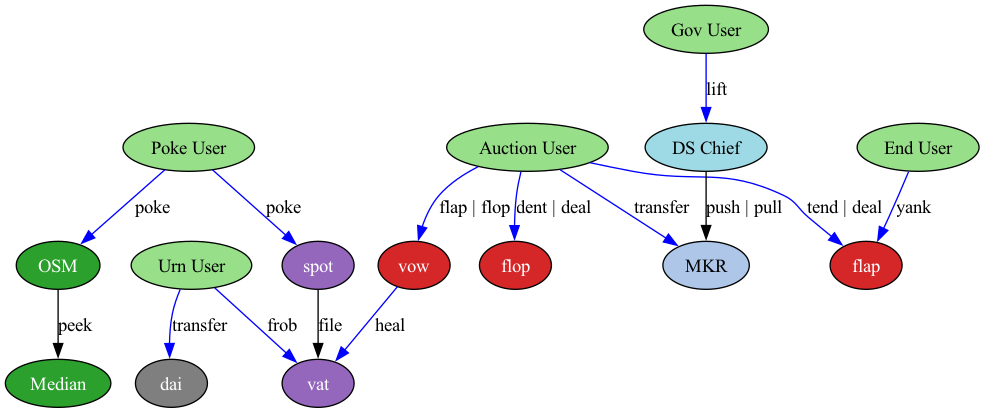

In [26]:
# Get the largest connected component
largest_cc = max(nx.connected_components(G_nx_undirected), key=len)

# Create a subgraph with only the nodes in the largest connected component
G_nx_undirected_conn = G_nx_undirected.subgraph(largest_cc).copy()

# Compute the Steiner tree of the subgraph
st = nx.algorithms.approximation.steiner_tree(G_nx_undirected_conn, SELECTED_NODES)

# make into directed, remove invalid edges
st_d = st.to_directed()
valid_edges = set(G_nx.edges)
for edge in list(st_d.edges):
    if edge not in valid_edges:
        st_d.remove_edge(*edge)

A = nx.drawing.nx_agraph.to_agraph(st_d)

A.draw('graph.png', prog='dot', format='png')

Image(filename='graph.png')